<font size="6">Kaggle Side project - Coffee Dataset</font>

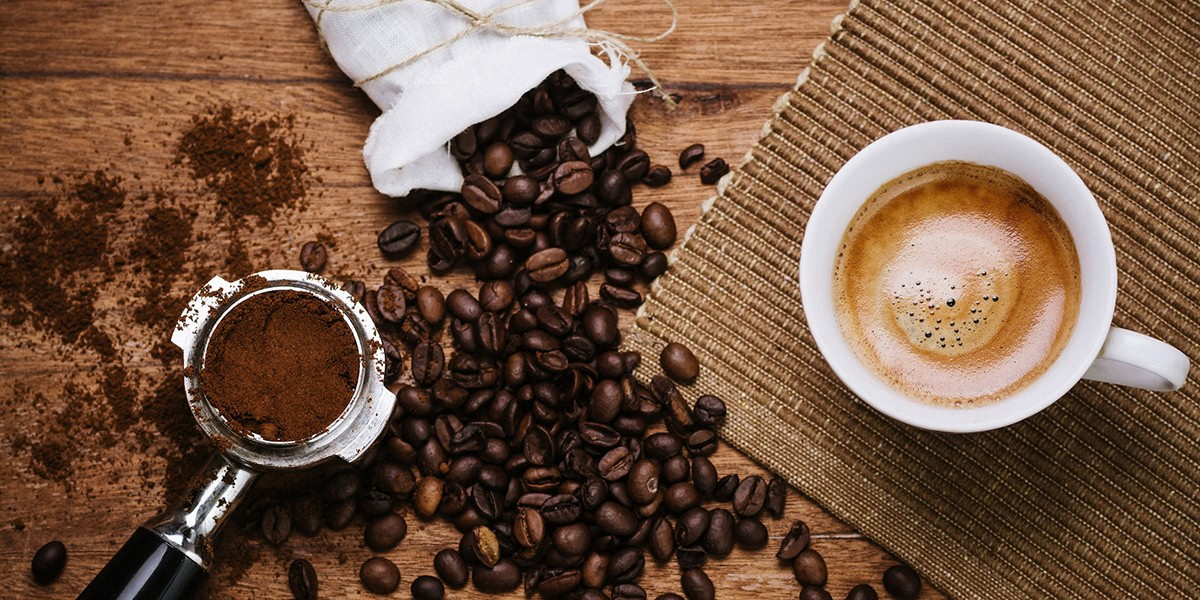

資料來源1 - kaggle：https://www.kaggle.com/datasets/michals22/coffee-dataset/data

資料來源2 - Arabica(阿拉比卡) & Robusta(羅布斯塔)咖啡豆的區別 : https://www.legal-upresso.com.tw/2021/08/17/arabica-vs-robusta/

資料描述：國際咖啡組織(International Coffee Organization)資料集中的咖啡經濟指標

>分析目的:了解coffee產品與市場供應趨勢
>>分析細項
>>1. 載入分析資料(Data Import)
>>2. 了解資料內容(Understanding Data)
>>3. 清理資料及轉置(Data Cleaning & Transform)
>>4. 定義分析項目，資料探索(Data Exploration)
>>5. 資料視覺化(Data Visualize)
>>6. 結論說明(Communication)

<font size="5">1. 載入分析資料(Data Import)</font>

><font size="4">1.1 載入模組(Module)</font>

In [1]:
#Linear Algebra & DataFrame 模組
import numpy as np
import pandas as pd

#可視化模組
import matplotlib.pyplot as plt
#中文化模組
from matplotlib.font_manager import FontProperties
#標楷體字型
tw_Kai = FontProperties(fname='TW-Kai-98_1.ttf')

><font size="4">1.2 載入欲分析的Datasets(全世界咖啡產業)</font>

In [2]:
#pd.read_csv讀取csv檔
coffee_production = pd.read_csv("coffee-datasets/Coffee_production.csv")

<font size="5">2.了解資料內容(Understanding Data)</font>

><font size="4">2.1 用head(10)確認前10項全世界咖啡產業的dataframe資料組成</font>

In [3]:
coffee_production.head(10)

,Country,Coffee type,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,Total_production
0,Angola,Robusta/Arabica,3.000000e+06,4.740000e+06,4.680000e+06,1.980000e+06,4.620000e+06,3.720000e+06,4.260000e+06,3.840000e+06,...,1.740000e+06,1.980000e+06,2.100000e+06,2.340000e+06,2.460000e+06,2.700000e+06,2.100000e+06,2.520000e+06,3.120000e+06,8.208000e+07
1,Bolivia (Plurinational State of),Arabica,7.380000e+06,6.240000e+06,7.200000e+06,3.060000e+06,7.020000e+06,8.520000e+06,7.500000e+06,8.460000e+06,...,7.920000e+06,6.300000e+06,7.200000e+06,6.000000e+06,5.040000e+06,4.680000e+06,5.040000e+06,4.980000e+06,4.860000e+06,2.070000e+08
2,Brazil,Arabica/Robusta,1.637160e+09,1.637580e+09,2.076180e+09,1.690020e+09,1.691520e+09,1.083600e+09,1.751820e+09,1.568880e+09,...,2.915520e+09,3.325080e+09,3.281340e+09,3.198300e+09,3.172260e+09,3.407280e+09,3.164400e+09,3.907860e+09,3.492660e+09,7.508298e+10
3,Burundi,Arabica/Robusta,2.922000e+07,4.002000e+07,3.720000e+07,2.358000e+07,3.984000e+07,2.604000e+07,2.406000e+07,1.500000e+07,...,1.224000e+07,2.436000e+07,9.780000e+06,1.488000e+07,1.614000e+07,1.176000e+07,1.212000e+07,1.224000e+07,1.632000e+07,6.236400e+08
4,Ecuador,Arabica/Robusta,9.024000e+07,1.274400e+08,7.110000e+07,1.241400e+08,1.425600e+08,1.132800e+08,1.195800e+08,7.146000e+07,...,4.950000e+07,4.968000e+07,3.996000e+07,3.864000e+07,3.864000e+07,3.870000e+07,3.744000e+07,2.976000e+07,3.354000e+07,1.900380e+09
5,Indonesia,Robusta/Arabica,4.464600e+08,5.095800e+08,3.341400e+08,4.045800e+08,3.220800e+08,2.743800e+08,4.932600e+08,4.572600e+08,...,4.133400e+08,7.842000e+08,7.740600e+08,6.567600e+08,7.551000e+08,6.924600e+08,6.511200e+08,5.770800e+08,6.859800e+08,1.540488e+10
6,Madagascar,Robusta,5.892000e+07,5.598000e+07,6.732000e+07,2.652000e+07,3.846000e+07,4.710000e+07,5.094000e+07,3.744000e+07,...,3.510000e+07,3.000000e+07,3.504000e+07,3.006000e+07,2.484000e+07,2.718000e+07,2.424000e+07,2.274000e+07,2.298000e+07,1.045560e+09
7,Malawi,Arabica,6.300000e+06,7.440000e+06,8.220000e+06,3.720000e+06,5.040000e+06,5.460000e+06,2.940000e+06,3.660000e+06,...,1.560000e+06,1.380000e+06,1.680000e+06,1.500000e+06,1.260000e+06,1.200000e+06,8.400000e+05,7.800000e+05,9.600000e+05,8.226000e+07
8,Papua New Guinea,Arabica/Robusta,5.778000e+07,4.482000e+07,5.400000e+07,6.114000e+07,6.834000e+07,6.012000e+07,6.534000e+07,6.444000e+07,...,8.484000e+07,4.296000e+07,5.010000e+07,4.788000e+07,4.272000e+07,7.026000e+07,4.404000e+07,5.580000e+07,4.512000e+07,1.803120e+09
9,Paraguay,Arabica,7.860000e+06,4.800000e+06,3.240000e+06,4.020000e+06,1.500000e+06,1.560000e+06,1.860000e+06,2.940000e+06,...,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,6.222000e+07


><font size="4">2.2 用shape、info、describe確認全世界咖啡產業的dataframe資料組成</font>

In [4]:
coffee_production.shape #55列&33欄

(55, 33)

In [5]:
coffee_production.info() #組成資料

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           55 non-null     object 
 1   Coffee type       55 non-null     object 
 2   1990/91           55 non-null     float64
 3   1991/92           55 non-null     float64
 4   1992/93           55 non-null     float64
 5   1993/94           55 non-null     float64
 6   1994/95           55 non-null     float64
 7   1995/96           55 non-null     float64
 8   1996/97           55 non-null     float64
 9   1997/98           55 non-null     float64
 10  1998/99           55 non-null     float64
 11  1999/00           55 non-null     float64
 12  2000/01           55 non-null     float64
 13  2001/02           55 non-null     float64
 14  2002/03           55 non-null     float64
 15  2003/04           55 non-null     float64
 16  2004/05           55 non-null     float64
 17 

In [6]:
coffee_production.describe()  #數量、平均數、標準差、最大/最小值、25%/50%/75%

,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,1998/99,1999/00,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,Total_production
count,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,...,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01
mean,1.017055e+08,1.104753e+08,1.074775e+08,1.001007e+08,1.017971e+08,9.525927e+07,1.127029e+08,1.089676e+08,1.187629e+08,1.433280e+08,...,1.541749e+08,1.649280e+08,1.679007e+08,1.639625e+08,1.703193e+08,1.770742e+08,1.785742e+08,1.881415e+08,1.800578e+08,4.104269e+09
std,2.510875e+08,2.668466e+08,3.022180e+08,2.489344e+08,2.510328e+08,1.858680e+08,2.602192e+08,2.430145e+08,3.142337e+08,4.012591e+08,...,4.469919e+08,4.931417e+08,5.030529e+08,4.918727e+08,5.059698e+08,5.225472e+08,5.135587e+08,5.851111e+08,5.390922e+08,1.112550e+10
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.080000e+06
25%,2.430000e+06,3.900000e+06,2.640000e+06,2.130000e+06,2.610000e+06,2.610000e+06,2.340000e+06,2.880000e+06,3.480000e+06,3.540000e+06,...,1.980000e+06,1.710000e+06,2.010000e+06,2.250000e+06,2.310000e+06,1.890000e+06,2.160000e+06,2.190000e+06,2.280000e+06,8.199000e+07
50%,2.766000e+07,2.778000e+07,3.000000e+07,2.652000e+07,2.436000e+07,2.604000e+07,2.406000e+07,1.800000e+07,2.634000e+07,2.184000e+07,...,2.094000e+07,2.004000e+07,1.548000e+07,1.488000e+07,1.758000e+07,1.620000e+07,1.584000e+07,1.860000e+07,1.842000e+07,6.236400e+08
75%,9.216000e+07,9.720000e+07,9.234000e+07,9.486000e+07,1.153200e+08,1.127700e+08,1.139700e+08,9.669000e+07,1.076700e+08,1.211700e+08,...,9.735000e+07,9.189000e+07,7.185000e+07,6.960000e+07,6.657000e+07,6.864000e+07,7.053000e+07,7.806000e+07,7.194000e+07,2.785140e+09
max,1.637160e+09,1.637580e+09,2.076180e+09,1.690020e+09,1.691520e+09,1.083600e+09,1.751820e+09,1.568880e+09,2.205660e+09,2.854680e+09,...,2.915520e+09,3.325080e+09,3.281340e+09,3.198300e+09,3.172260e+09,3.407280e+09,3.164400e+09,3.907860e+09,3.492660e+09,7.508298e+10


<font size="5">3. 清理資料及轉置(Data Cleaning & Transform)</font>

><font size="4">3.1 確認資料是否含missing value</font>
>>結論 : coffee_production沒有缺失值

In [7]:
print(coffee_production.isnull().sum())

Country             0
Coffee type         0
1990/91             0
1991/92             0
1992/93             0
1993/94             0
1994/95             0
1995/96             0
1996/97             0
1997/98             0
1998/99             0
1999/00             0
2000/01             0
2001/02             0
2002/03             0
2003/04             0
2004/05             0
2005/06             0
2006/07             0
2007/08             0
2008/09             0
2009/10             0
2010/11             0
2011/12             0
2012/13             0
2013/14             0
2014/15             0
2015/16             0
2016/17             0
2017/18             0
2018/19             0
2019/20             0
Total_production    0
dtype: int64


><font size="4">3.2 轉置資料取出全世界咖啡產業國家</font>

In [8]:
production_country = coffee_production[['Country', 'Coffee type', 'Total_production']]
production_country = production_country.set_index('Country', drop=False).sort_values('Total_production', ascending=False) #descend由大至小排列
all_country = production_country
all_country

,Country,Coffee type,Total_production
Country,,,
Brazil,Brazil,Arabica/Robusta,7.508298e+10
Viet Nam,Viet Nam,Robusta/Arabica,2.880318e+10
Colombia,Colombia,Arabica,2.159862e+10
Indonesia,Indonesia,Robusta/Arabica,1.540488e+10
Ethiopia,Ethiopia,Arabica,8.669520e+09
India,India,Robusta/Arabica,8.222220e+09
Mexico,Mexico,Arabica/Robusta,7.853520e+09
Guatemala,Guatemala,Arabica/Robusta,7.020540e+09
Honduras,Honduras,Arabica,6.672720e+09


><font size="4">3.3 確認Coffee type</font>

In [9]:
coffee_production['Coffee type'].value_counts()

Coffee type
Arabica            22
Robusta            15
Robusta/Arabica    10
Arabica/Robusta     8
Name: count, dtype: int64

<font size="5">4. 定義分析項目，資料探索(Data Exploration)</font>
>由上述資料預處理後，dataset中資料可分析各個國家從1990~2020年間發展趨勢及所產出咖啡豆的品種
>>依此進行資料視覺化(Data Visualize)分析

<font size="5">5. 資料視覺化(Data Visualize)</font>

><font size="4">5.1 確認所有咖啡生產國家產量(直條圖)</font>

In [10]:
print(f"所有咖啡生產國家共有 {all_country['Total_production'].shape[0]} 個")

所有咖啡生產國家共有 55 個


Text(0, 0.5, '產品數')

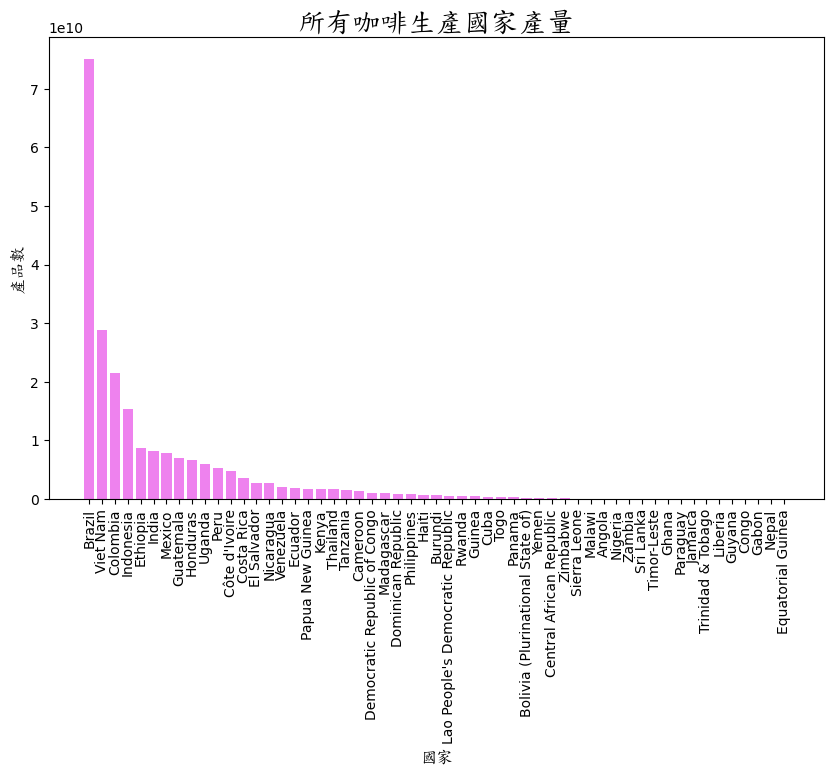

In [20]:
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = (12.0, 8.0) 
plt.bar(all_country.index,all_country['Total_production'],align = 'center',color='violet')
plt.title('所有咖啡生產國家產量', fontproperties=tw_Kai, fontsize=20)
plt.xlabel('國家', fontproperties=tw_Kai, fontsize=12)
plt.ylabel('產品數', fontproperties=tw_Kai, fontsize=12)

><font size="4">5.2 確認所有咖啡產量國家佔比(圓餅圖)</font>

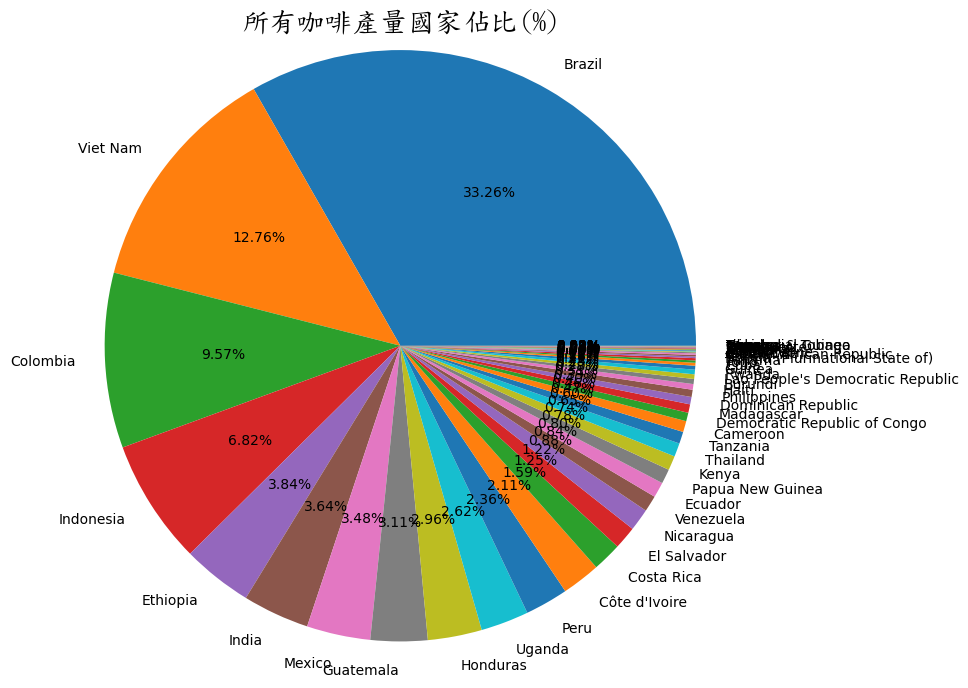

In [12]:
total_production_list = all_country['Total_production'].values.tolist()
all_country_list = all_country['Country'].values.tolist()
plt.pie(total_production_list,
        radius=1.2,
        labels=all_country_list,
        autopct='%.2f%%')
plt.title('所有咖啡產量國家佔比(%)', fontproperties=tw_Kai, fontsize=20)
plt.show()

分析結論
1. 所有咖啡生產國家共有55個，以直條圖分析，Brail(巴西)、Viet Nam(越南)、Columbia(哥倫比亞)、Indonesia(印尼)這四個國家產量遠高於其他國家
2. 再依圓餅梯確認，Brail(巴西)、Viet Nam(越南)、Columbia(哥倫比亞)、Indonesia(印尼)，總佔比為62.41%，其餘佔比並無明顯差異
>以下列4個咖啡重點生產國家當代表繼續做細部分析

><font size="4">5.3 分析四個咖啡重點生產國家1990~2020產量比較</font>

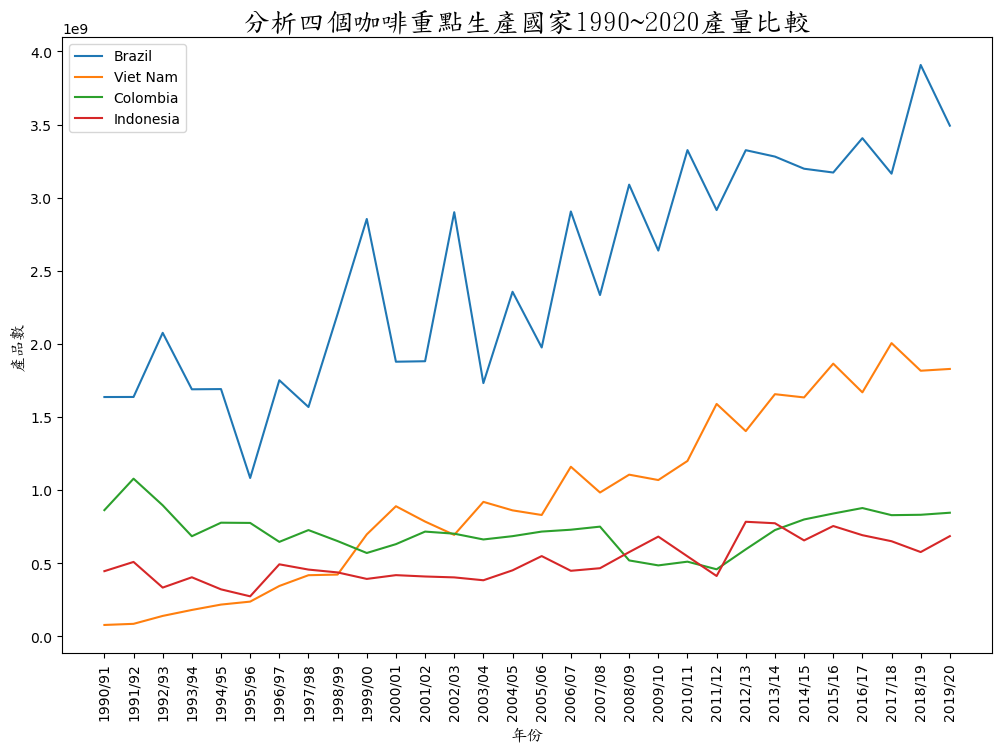

In [13]:
Brazil = coffee_production[coffee_production['Country'] == "Brazil"]
Viet_Nam = coffee_production[coffee_production['Country'] == "Viet Nam"]
Colombia = coffee_production[coffee_production['Country'] == "Colombia"]
Indonesia =  coffee_production[coffee_production['Country'] == "Indonesia"]

fig, ax = plt.subplots()
plt.xticks(rotation = 90)
ax.plot(Brazil.iloc[0,2:len(Brazil.columns)-1], label = 'Brazil') # len(Brazil.columns)-1把Total_production欄位取消
ax.plot(Viet_Nam.iloc[0,2:len(Viet_Nam.columns)-1], label = 'Viet Nam')
ax.plot(Colombia.iloc[0,2:len(Colombia.columns)-1], label = 'Colombia')
ax.plot(Indonesia.iloc[0,2:len(Indonesia.columns)-1], label = 'Indonesia')

ax.set_title('分析四個咖啡重點生產國家1990~2020產量比較', fontproperties=tw_Kai, fontsize=20)
ax.set_xlabel('年份', fontproperties=tw_Kai, fontsize=12)
ax.set_ylabel('產品數', fontproperties=tw_Kai, fontsize=12)
ax.legend()

分析結論
1. 依折線圖分析，Brail(巴西)從1990開始生產總量就高於其他3個國家，並逐年攀升
2. Viet Nam(越南)從2000年開始超越Columbia(哥倫比亞)、Indonesia(印尼)成為第二大咖啡生產國，亦逐年攀升

><font size="4">5.4 分析每個國家咖啡豆生產品種</font>

In [14]:
coffee_type_list = all_country['Coffee type'].values.tolist()
coffee_type_list = list(set(coffee_type_list))
print(f"總共有{len(coffee_type_list)}種咖啡豆分類, 分別是{coffee_type_list[0]}、{coffee_type_list[1]}、{coffee_type_list[2]}及{coffee_type_list[-1]}")

總共有4種咖啡豆分類, 分別是Robusta/Arabica、Arabica、Arabica/Robusta及Robusta


In [15]:
Arabica = all_country[all_country['Coffee type'] == 'Arabica']
Robusta_Arabica = all_country[all_country['Coffee type'] == 'Robusta/Arabica']
Robusta = all_country[all_country['Coffee type'] == 'Robusta']
Arabica_Robusta = all_country[all_country['Coffee type'] == 'Arabica/Robusta']

><font size="4">Arabica(阿拉比卡)生產數量</font>

Text(0, 0.5, '產品數')

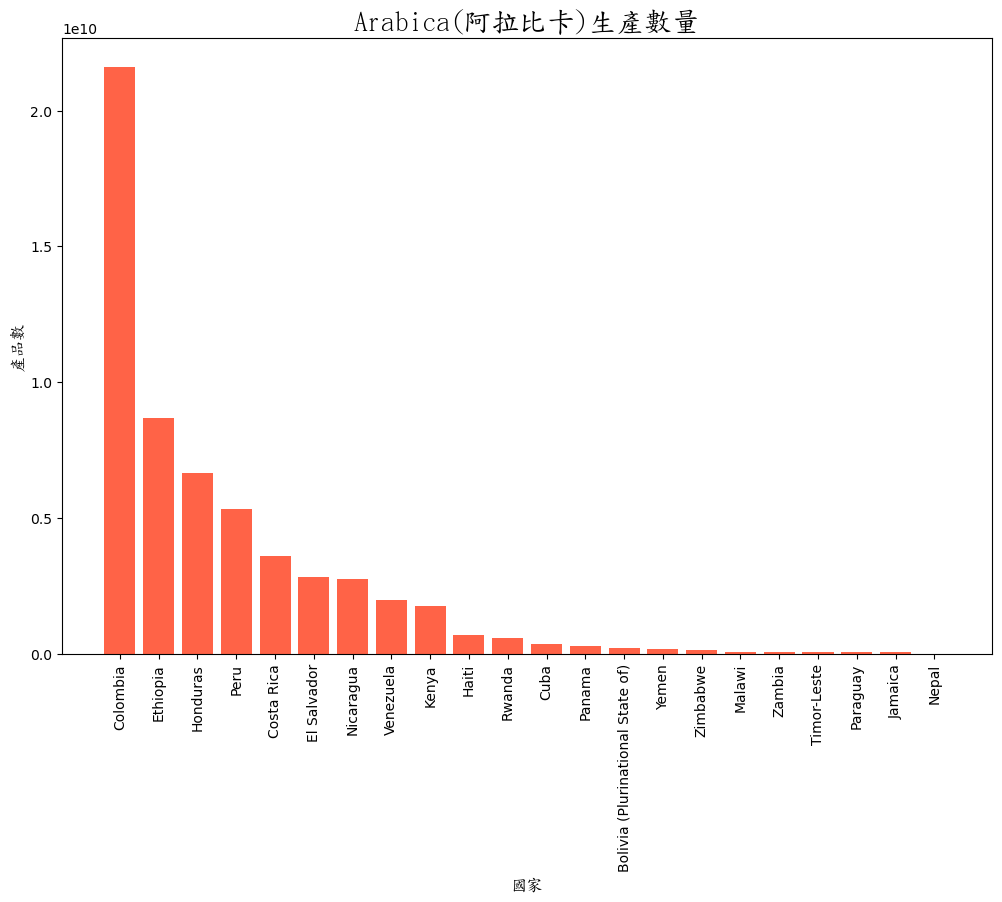

In [16]:
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = (10.0, 6.0) 
plt.bar(Arabica.index,Arabica['Total_production'], align ='center', color='tomato')
plt.title('Arabica(阿拉比卡)生產數量', fontproperties=tw_Kai, fontsize=20)
plt.xlabel('國家', fontproperties=tw_Kai, fontsize=12)
plt.ylabel('產品數', fontproperties=tw_Kai, fontsize=12)

><font size="4">Robusta(羅布斯塔)生產數量</font>

Text(0, 0.5, '產品數')

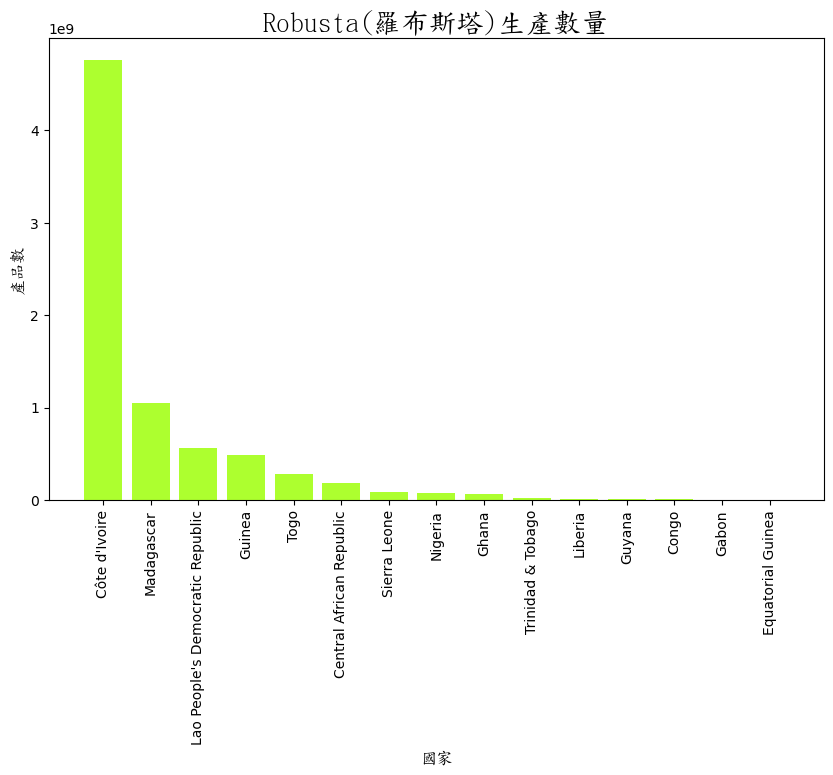

In [17]:
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = (10.0, 6.0) 
plt.bar(Robusta.index,Robusta['Total_production'], align ='center', color='greenyellow')
plt.title('Robusta(羅布斯塔)生產數量', fontproperties=tw_Kai, fontsize=20)
plt.xlabel('國家', fontproperties=tw_Kai, fontsize=12)
plt.ylabel('產品數', fontproperties=tw_Kai, fontsize=12)

><font size="4">Arabica/Robusta(阿拉比卡為主，羅布斯塔為輔)生產數量</font>

Text(0, 0.5, '產品數')

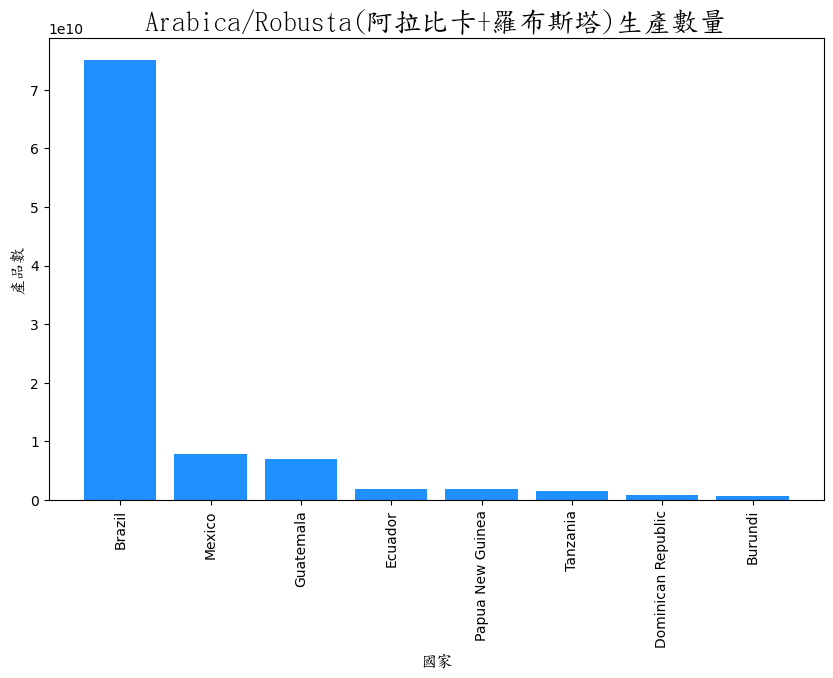

In [18]:
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = (10.0, 6.0) 
plt.bar(Arabica_Robusta.index,Arabica_Robusta['Total_production'], align ='center', color='dodgerblue')
plt.title('Arabica/Robusta(阿拉比卡+羅布斯塔)生產數量', fontproperties=tw_Kai, fontsize=20)
plt.xlabel('國家', fontproperties=tw_Kai, fontsize=12)
plt.ylabel('產品數', fontproperties=tw_Kai, fontsize=12)

><font size="4">Robusta/Arabica(羅布斯塔為主，阿拉比卡為輔)生產數量</font>

Text(0, 0.5, '產品數')

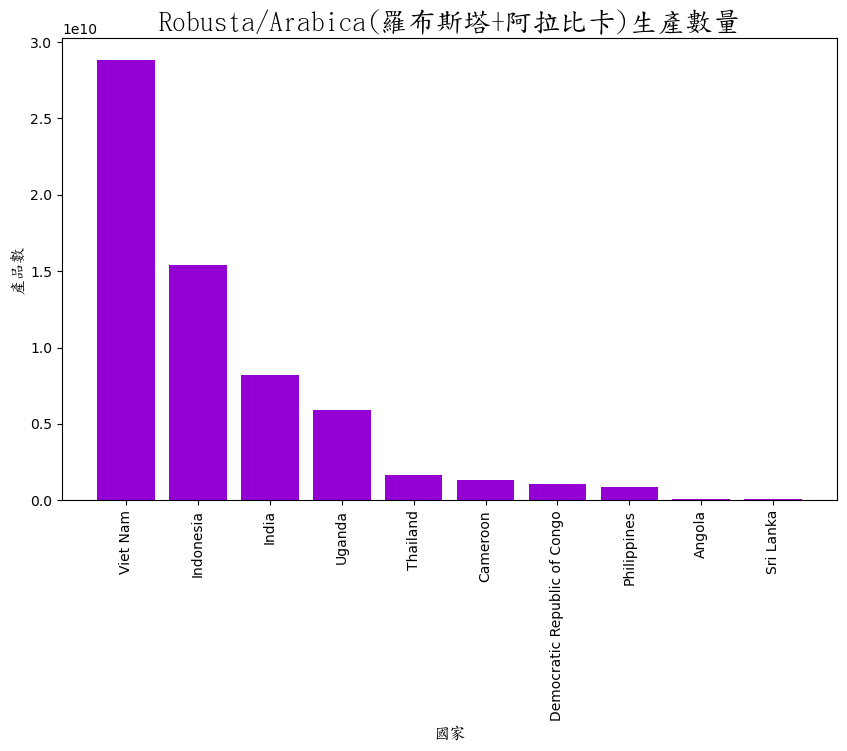

In [19]:
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = (10.0, 6.0) 
plt.bar(Robusta_Arabica.index,Robusta_Arabica['Total_production'], align ='center', color='darkviolet')
plt.title('Robusta/Arabica(羅布斯塔+阿拉比卡)生產數量', fontproperties=tw_Kai, fontsize=20)
plt.xlabel('國家', fontproperties=tw_Kai, fontsize=12)
plt.ylabel('產品數', fontproperties=tw_Kai, fontsize=12)

分析結論 - 咖啡豆最大宗生產國
1. Arabica(阿拉比卡) : Columbia(哥倫比亞 - 中南美洲)
2. Robusta(羅布斯塔) : Cote d'ivoire(象牙海岸- 非洲)
3. Arabica/Robusta(阿拉比卡+羅布斯塔)  : Brazil(巴西- 中南美洲)
4. Robusta/Arabica(羅布斯塔+阿拉比卡)  : Viet Nam(越南 - 東南亞)

<font size="5">6. 結論說明(Communication)</font>

1. 在所有生產咖啡豆的55個國家中，以Brazil(巴西)供應佔比最多(33.26%)，且從1990~2020年間有逐步攀升趨勢。
2. 咖啡豆分有2種，果香味重的Arabica(阿拉比卡)和苦味重的Robusta(羅布斯塔)咖啡豆，其中還有兩者皆有生產的國家。
3. 以Arabica(阿拉比卡)及Arabica/Robusta(阿拉比卡+羅布斯塔)咖啡豆最大宗生產國家來看，位置集中於中南美洲，溫度較低且環境潮濕利於Arabica(阿拉比卡)咖啡豆生長
4. 以Robusta(羅布斯塔)及Robusta/Arabica(羅布斯塔+阿拉比卡)咖啡豆最大宗生產國家來看，位置集中於東南亞、非洲，溫度較高且環境炎熱利於Robusta(羅布斯塔)咖啡豆生長